<a href="https://colab.research.google.com/github/sanikaadkurkar/Iris-Flower-Classification/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: Sanika Balu Adkurkar                              
TASK1: IRIS FLOWER CLASSIFICATION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

LOADING THE DATASET

In [ ]:
columns=['sepal length','sepal width','petal length','class label']
#load the data
df=pd.read_csv('/content/Iris.csv.zip',names=columns)
df.head()

,,sepal length,sepal width,petal length,class label
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


VISUALIZATION OF DATASET

In [ ]:
df.describe()

,sepal length,sepal width,petal length,class label
count,151,151,151,151
unique,24,44,23,4
top,3.0,1.5,0.2,Iris-setosa
freq,26,14,28,50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 151 entries, ('Id', 'SepalLengthCm') to ('150', '5.9')
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal length  151 non-null    object
 1   sepal width   151 non-null    object
 2   petal length  151 non-null    object
 3   class label   151 non-null    object
dtypes: object(4)
memory usage: 11.8+ KB


In [ ]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
class label     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=pd.read_csv('/content/Iris.csv.zip')
df['Species']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
species_name=le.classes_
print(species_name)


['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
x=df.drop(columns=['Id','Species'])
y=df['Species']
x.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


DATA VISUALIZATION                                      
CHART1: Pie plot as per count of different varieties of flowers

In [ ]:
a=df.groupby('Species',as_index=False)['SepalLengthCm'].count()
a

,Species,SepalLengthCm
0,0,50
1,1,50
2,2,50


In [ ]:
iris=pd.read_csv('/content/Iris.csv.zip')

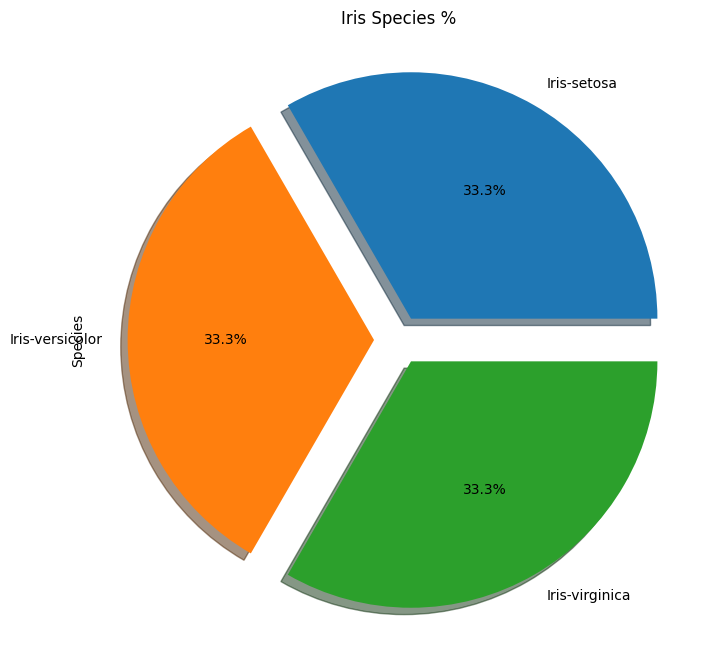

In [ ]:
ax=plt.subplots(1,1,figsize=(10,8))
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Iris Species %")
plt.show()

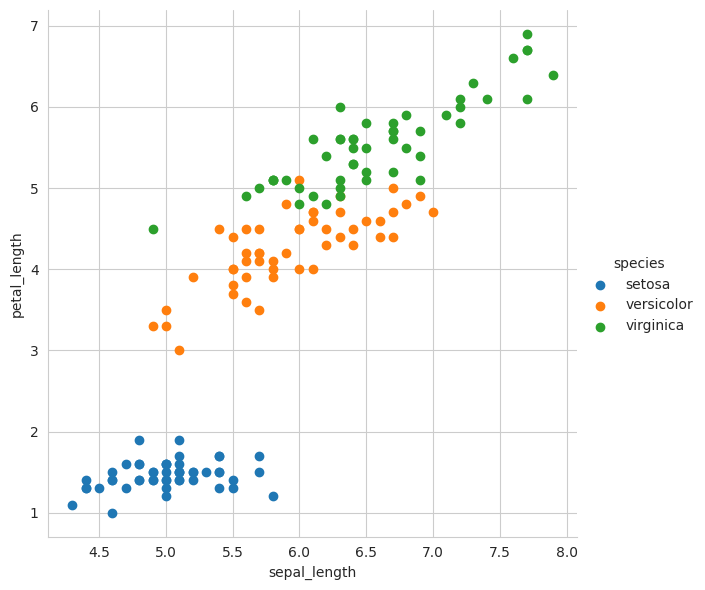

In [ ]:
import seaborn as sns

iris=sns.load_dataset('iris')
sns.set_style("whitegrid")
sns.FacetGrid(iris,hue="species",height=6).map(plt.scatter,'sepal_length','petal_length').add_legend()

PLOTTING HEATMAP

<ipython-input-16-5caea8dba5d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')


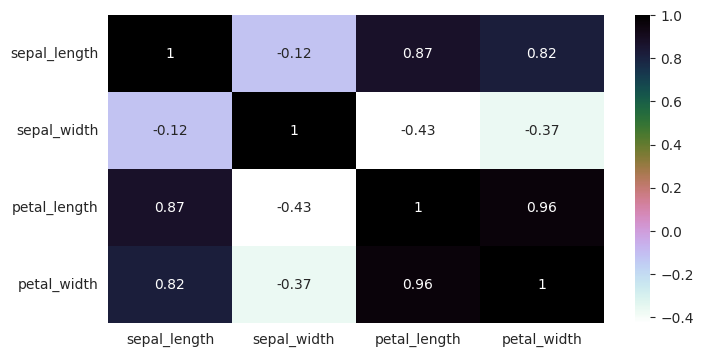

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')
plt.show()

PLOTTING PAIRPLOT

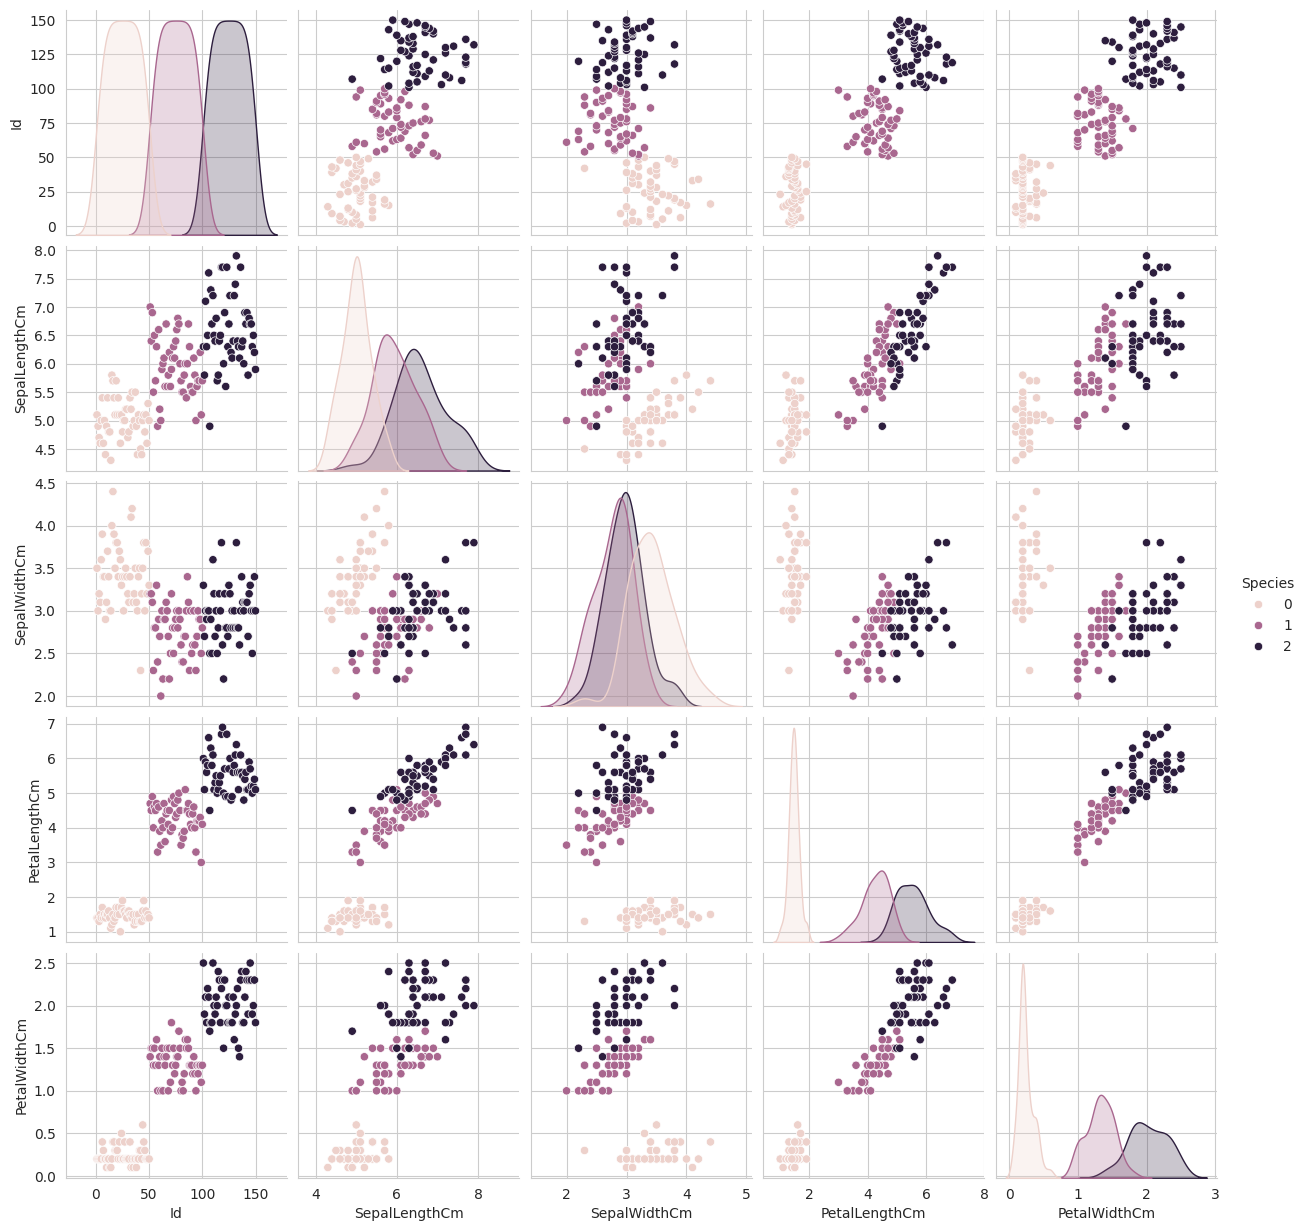

In [ ]:
sns.pairplot(df,hue='Species')

In [ ]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=69)

In [ ]:
x_train.shape

(105, 4)

SPLITTING DATA INTO TRAINING AND TESTING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
print(x_train[:1])
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


MODEL1: LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x,y)

LogisticRegression()

Accuracy

In [ ]:
model.score(x,y)

0.9733333333333334

Make Predictions

In [ ]:
expected=y
predicted=model.predict(x)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Summarize the fit of model

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
print(metrics.confusion_matrix(expected,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model=Sequential()
model.add(Dense(units=32,activation='relu',input_shape=(x_train.shape[-1],)))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3,activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
